# Setting

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import sys
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
import warnings
import tensorflow as tf
import tensorflow_datasets as tfds
warnings.filterwarnings("ignore")

# 다층 신경망의 활성화 함수 선택

기술적으로는 미분 가능한 함수면 어떤 함수라도 다층 신경망의 활성화 함수로 사용할 수 있다.

아달린에서처럼 선형 활성화 함수를 사용할 수 있는데 유용하지 않다.

복잡한 문제를 해결하기 위해선 일반적인 인공 신경망에 비선형성이 필요하기 때문이다.

로지스틱 (시그모이드) 활성화 함수가 뉴런 개념을 가장 비슷하게 흉내 낸 함수이다.

이 함수 출력을 뉴런의 활성화 여부에 대한 확률로 생각할 수 있다.

이 활성화 함수는 큰 음수 입력이 들어오면 문제가 된다.

이 경우 출력이 0에 가까워지고 신경망이 느리게 학습을 하기 때문에 지역 최솟값에 갇힐 가능성이 높다.

## 시그모이드

In [4]:
X=np.array([1,1.4,2.5])
w=np.array([0.4,0.3,0.5])

def net_input(X,w):
  return np.dot(X,w)

def logistic(z):
  return 1/(1+np.exp(-z))

def logistic_activation(X,w):
  z=net_input(X,w)
  return logistic(z)

print('P(y=1|x)= %.3f' % logistic_activation(X,w))

P(y=1|x)= 0.888


In [5]:
# W : (n_output_units, n_hidden_units+1) 크기의 배열
# 첫 번째 열은 절편 유닛입니다

W = np.array([[1.1, 1.2, 0.8, 0.4],
              [0.2, 0.4, 1.0, 0.2],
              [0.6, 1.5, 1.2, 0.7]])

# A : (n_hidden_units + 1, n_samples) 크기의 배열
# 이 배열의 첫 번째 열은 1입니다

A = np.array([[1, 0.1, 0.4, 0.6]])
Z = np.dot(W, A[0])
y_probas = logistic(Z)
print('최종 입력: \n', Z)

print('유닛 출력:\n', y_probas) 

최종 입력: 
 [1.78 0.76 1.65]
유닛 출력:
 [0.85569687 0.68135373 0.83889105]


In [6]:
#세 값의 합이 1은 ㅇ나지만 가장 큰 값을 선택하면 된다.

y_class=np.argmax(Z,axis=0)
print('예측 클래스 레이블 : %d' % y_class)

예측 클래스 레이블 : 0


## 소프트맥스

In [7]:
def softmax(z):
  return np.exp(z)/np.sum(np.exp(z))

y_probas=softmax(Z)

print('확률:\n', y_probas)

np.sum(y_probas)

확률:
 [0.44668973 0.16107406 0.39223621]


1.0

In [8]:
Z_tensor=tf.expand_dims(Z,axis=0)
tf.keras.activations.softmax(Z_tensor)

<tf.Tensor: shape=(1, 3), dtype=float64, numpy=array([[0.44668973, 0.16107406, 0.39223621]])>

## 하이퍼볼릭 탄젠트

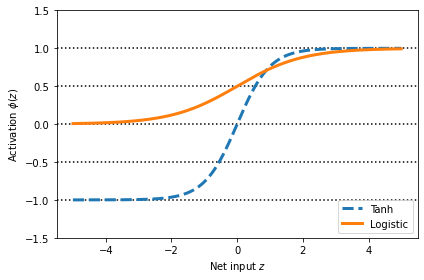

In [9]:
def tanh(z):
  e_p=np.exp(z)
  e_m=np.exp(-z)
  return (e_p-e_m)/(e_p+e_m)

z=np.arange(-5,5,0.005)
log_act=logistic(z)
tanh_act=tanh(z)
plt.ylim([-1.5, 1.5])
plt.xlabel('Net input $z$')
plt.ylabel('Activation $\phi(z)$')
plt.axhline(1, color='black', linestyle=':')
plt.axhline(0.5, color='black', linestyle=':')
plt.axhline(0, color='black', linestyle=':')
plt.axhline(-0.5, color='black', linestyle=':')
plt.axhline(-1, color='black', linestyle=':')
plt.plot(z, tanh_act,
    linewidth=3, linestyle='--',
    label='Tanh')
plt.plot(z, log_act,
    linewidth=3,
    label='Logistic')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.savefig('images/13_8.png', dpi=300)
plt.show()

In [10]:
np.tanh(z)

array([-0.9999092 , -0.99990829, -0.99990737, ...,  0.99990644,
        0.99990737,  0.99990829])

In [12]:
tf.keras.activations.tanh(z)

<tf.Tensor: shape=(2000,), dtype=float64, numpy=
array([-0.9999092 , -0.99990829, -0.99990737, ...,  0.99990644,
        0.99990737,  0.99990829])>

In [13]:
from scipy.special import expit #로지스틱 함수

expit(z)

array([0.00669285, 0.00672617, 0.00675966, ..., 0.99320669, 0.99324034,
       0.99327383])

In [14]:
tf.keras.activations.sigmoid(z)

<tf.Tensor: shape=(2000,), dtype=float64, numpy=
array([0.00669285, 0.00672617, 0.00675966, ..., 0.99320669, 0.99324034,
       0.99327383])>

## 렐루 활성화 함수

하이퍼볼릭 탄젠트와 로지스틱 활성화 함수의 그레디언트 소실 문제를 해결할 수 있다.

-> 훈련 과정에 가중치가 매우 느리게 학습되는 문제 해결

In [15]:
tf.keras.activations.relu(z)

<tf.Tensor: shape=(2000,), dtype=float64, numpy=array([0.   , 0.   , 0.   , ..., 4.985, 4.99 , 4.995])>